In [7]:
import os
import json
from collections import Counter

# JSON 파일들이 있는 폴더 경로
folder_path = "/data/nota/eda용json/train"

# 모든 JSON 파일에서 'task' 카테고리 합산
category_counts = Counter()

# 폴더 내 JSON 파일 반복 처리
for file_name in os.listdir(folder_path):
    if file_name.endswith(".json"):  # JSON 파일만 처리
        file_path = os.path.join(folder_path, file_name)
        with open(file_path, "r", encoding="utf-8") as file:
            data = json.load(file)
            annotations = data.get("annotation", [])
            task_categories = [item.get("task") for item in annotations if "task" in item]
            category_counts.update(task_categories)  # 현재 파일의 카테고리 개수 합산

# 결과 출력
for category, count in category_counts.items():
    print(f"'{category}': {count}개")


'asr': 1672622개
'audiocaption': 382177개
'QA': 551759개
'phone_recognition': 281239개
'audiocaption_v2': 61112개
'gender_recognition': 28539개


In [8]:
import os
import json
from collections import Counter

# JSON 파일들이 있는 폴더 경로
folder_path = "/data/nota/eda용json/test"

# 모든 JSON 파일에서 'task' 카테고리 합산
category_counts = Counter()

# 폴더 내 JSON 파일 반복 처리
for file_name in os.listdir(folder_path):
    if file_name.endswith(".json"):  # JSON 파일만 처리
        file_path = os.path.join(folder_path, file_name)
        with open(file_path, "r", encoding="utf-8") as file:
            data = json.load(file)
            annotations = data.get("annotation", [])
            task_categories = [item.get("task") for item in annotations if "task" in item]
            category_counts.update(task_categories)  # 현재 파일의 카테고리 개수 합산

# 결과 출력
for category, count in category_counts.items():
    print(f"'{category}': {count}개")


'asr': 2939개
'audiocaption_v2': 4355개


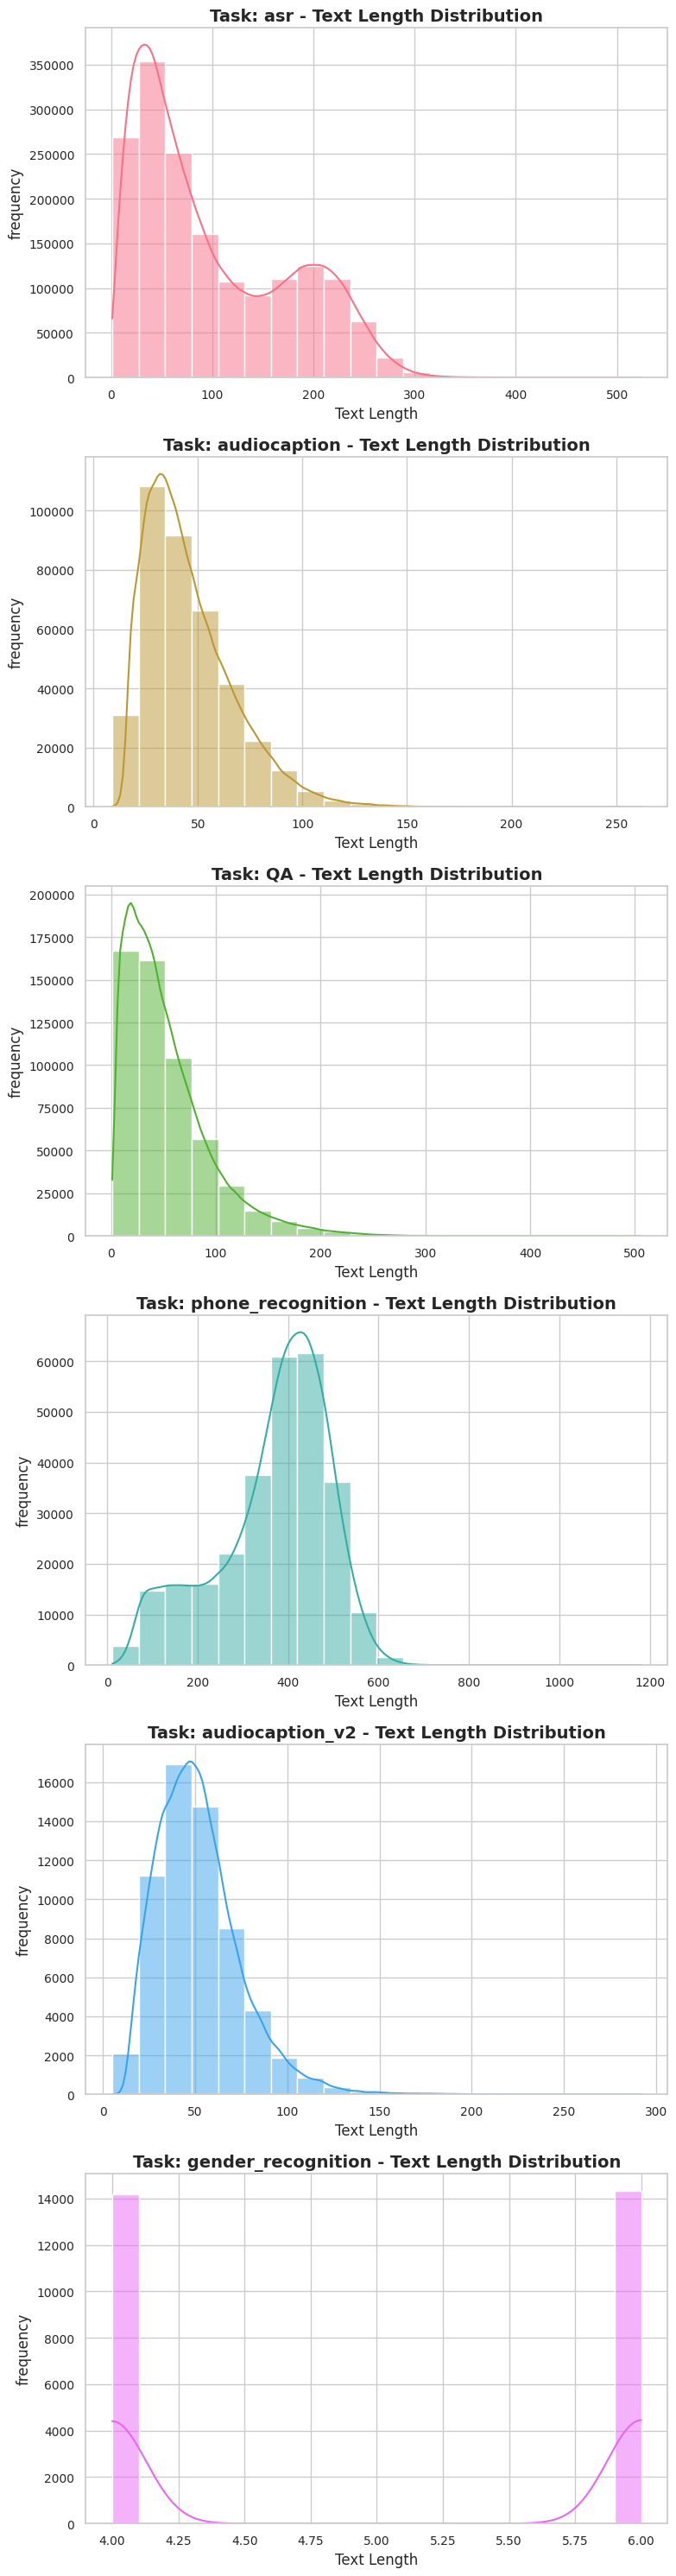

In [8]:
import os
import json
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict

# JSON 파일들이 있는 폴더 경로
folder_path = "/data/nota/eda용json/train"

# task별 text 길이를 저장할 딕셔너리
task_text_lengths = defaultdict(list)

# 폴더 내 JSON 파일 반복 처리
for file_name in os.listdir(folder_path):
    if file_name.endswith(".json"):  # JSON 파일만 처리
        file_path = os.path.join(folder_path, file_name)
        with open(file_path, "r", encoding="utf-8") as file:
            try:
                data = json.load(file)
                annotations = data.get("annotation", [])
                for item in annotations:
                    if "task" in item and "text" in item:  # 'task'와 'text'가 존재하는 경우
                        text_length = len(item["text"])  # 문자열 길이 계산
                        task_text_lengths[item["task"]].append(text_length)  # task별로 길이 저장
            except json.JSONDecodeError:
                print(f"파일 {file_name}에서 오류 발생. 건너뜁니다.")

# 그래프 스타일 설정
sns.set(style="whitegrid")

# 색상 팔레트 설정 (그래프별 다른 색상 적용)
palette = sns.color_palette("husl", len(task_text_lengths))

# 각 task별 개별 그래프 생성
num_tasks = len(task_text_lengths)
fig, axes = plt.subplots(num_tasks, 1, figsize=(8, 5 * num_tasks))  # task 수에 따라 서브플롯 생성

# task가 하나만 있을 경우 리스트로 변환
if num_tasks == 1:
    axes = [axes]  

# 각 task별로 그래프 그리기
for ax, (task, lengths), color in zip(axes, task_text_lengths.items(), palette):
    sns.histplot(lengths, kde=True, bins=20, ax=ax, color=color)
    ax.set_title(f"Task: {task} - Text Length Distribution", fontsize=14, fontweight="bold")
    ax.set_xlabel("Text Length", fontsize=12)
    ax.set_ylabel("frequency", fontsize=12)
    ax.tick_params(axis="both", labelsize=10)

plt.tight_layout()  # 그래프 간격 조정
plt.show()
